## Telco Customer Churn Analize Test


In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('Test_Dataset.csv')
rows, columns = df.shape
rows , columns

(1500, 21)

### Dropping Duplicates

In [80]:
print('No of duplicates: ' + str(df.duplicated().sum()))
df.customer_id.drop_duplicates()
df.drop_duplicates()

No of duplicates: 0


,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Unnamed: 19,Unnamed: 20
0,3322,91,445.0,yes,no,0.0,258.4,112.0,42.89,190.0,...,14.47,158.6,105.0,7.09,12.1,3.0,3.27,2.0,NaN,NaN
1,3323,113,445.0,no,yes,20.0,155.8,81.0,28.83,168.5,...,13.73,275.5,105.0,12.22,8.7,3.0,2.35,5.0,NaN,NaN
2,3324,122,445.0,no,no,0.0,237.2,137.0,40.30,263.8,...,22.76,251.3,105.0,10.81,8.8,4.0,2.38,1.0,NaN,NaN
3,3325,103,445.0,no,no,0.0,133.6,117.0,23.60,156.1,...,13.37,207.2,105.0,9.95,10.4,7.0,2.81,8.0,NaN,NaN
4,3326,111,452.0,no,no,0.0,115.6,120.0,24.54,211.1,...,18.79,140.9,105.0,5.76,12.7,1.0,3.43,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4817,23,547.0,no,no,0.0,321.6,107.0,54.67,251.6,...,21.39,141.1,158.0,6.35,11.3,3.0,3.05,2.0,NaN,NaN
1496,4818,23,547.0,no,no,0.0,334.6,107.0,52.67,261.6,...,21.39,127.1,158.0,6.35,11.3,2.0,3.05,2.0,NaN,NaN
1497,4819,103,452.0,no,no,0.0,70.9,134.0,12.05,134.5,...,11.43,168.8,164.0,7.60,12.0,6.0,3.24,2.0,NaN,NaN
1498,4820,34,452.0,no,no,0.0,193.7,74.0,32.93,126.9,...,10.79,221.2,166.0,9.95,8.8,4.0,2.38,0.0,NaN,NaN


### Impute Missing Values

Dropping unused column

In [81]:
del df['Unnamed: 20']
del df['Unnamed: 19']

In [82]:
def d_types_report(df):
    columns=[]
    d_types=[]
    uniques=[]
    n_uniques=[]
    null_values=[]
    null_values_percentage=[]
    
    for i in df.columns:
        columns.append(i)
        d_types.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
        null_values.append(df[i].isna().sum())
        null_values_percentage.append(null_values[-1] * 100 / rows)

    return pd.DataFrame({"Columns": columns, "Data_Types": d_types, "Unique_values": uniques, "N_Uniques": n_uniques,  "Null_Values": null_values, "Null_Values_percentage": null_values_percentage})
report = d_types_report(df)
report

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,customer_id,int64,"[3322, 3323, 3324, 3325, 3326]",1500,0,0.000000
1,account_length,int64,"[91, 113, 122, 103, 111]",188,0,0.000000
2,location_code,float64,"[445.0, 452.0, 547.0, nan]",3,2,0.133333
3,intertiol_plan,object,"[yes, no, nan]",2,4,0.266667
4,voice_mail_plan,object,"[no, yes, nan]",2,4,0.266667
5,number_vm_messages,float64,"[0.0, 20.0, 34.0, 35.0, 29.0]",42,1,0.066667
6,total_day_min,float64,"[258.4, 155.8, 237.2, 133.6, 115.6]",1058,3,0.200000
7,total_day_calls,float64,"[112.0, 81.0, 137.0, 117.0, 120.0]",109,3,0.200000
8,total_day_charge,float64,"[42.89, 28.83, 40.3, 23.6, 24.54]",1074,4,0.266667
9,total_eve_min,float64,"[190.0, 168.5, 263.8, 156.1, 211.1]",1039,2,0.133333


In [83]:
categorical_columns = ['intertiol_plan', 'voice_mail_plan', 'Churn', 'location_code']

In [84]:
null_columns = report[report['Null_Values'] > 0 ]['Columns'].tolist()

##### Impute features using KNN

In [85]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer 
    
mice_imputer = IterativeImputer()
imputer = SimpleImputer(strategy='most_frequent')

for col in null_columns:
    if col in categorical_columns:
        impute = imputer.fit(df[[col]])
        df[[col]] = impute.transform(df[[col]])
    else:
        df[col] = mice_imputer.fit_transform(df[[col]])



### Treating Outliers

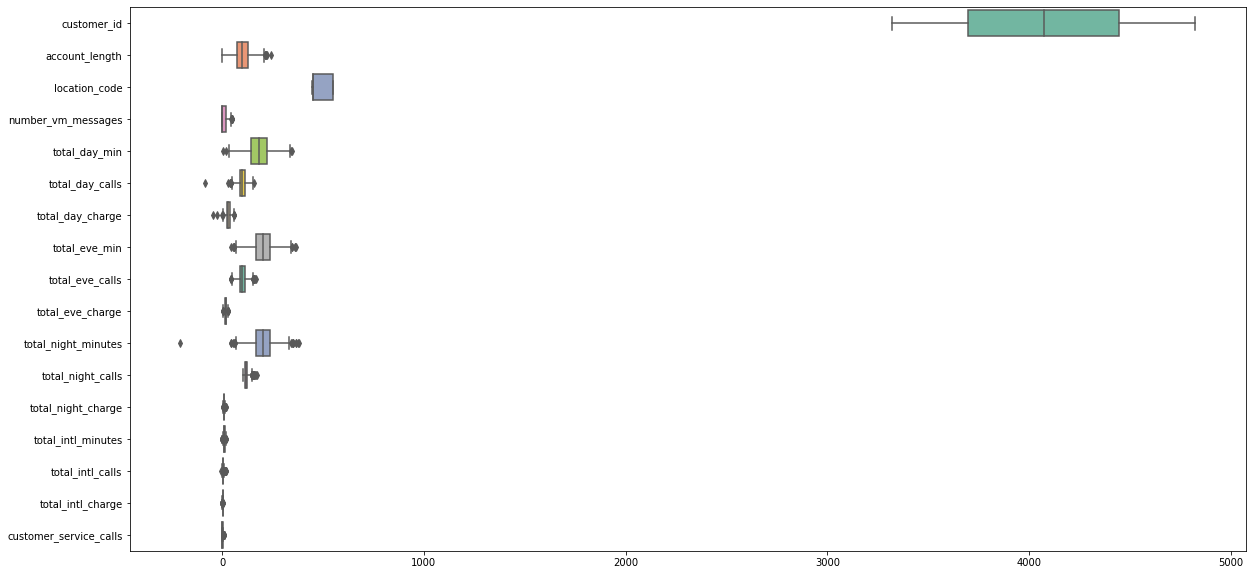

In [86]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [87]:
#sns.pairplot(df)

In [88]:
for i in df.columns:
    if i in categorical_columns:
        continue
    else:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1-1.5*IQR
        Upper_Whisker = Q3+1.5*IQR
        df[i] = df[i].apply(lambda x: df[i].median() if (x > Upper_Whisker or x < Lower_Whisker)  else x)

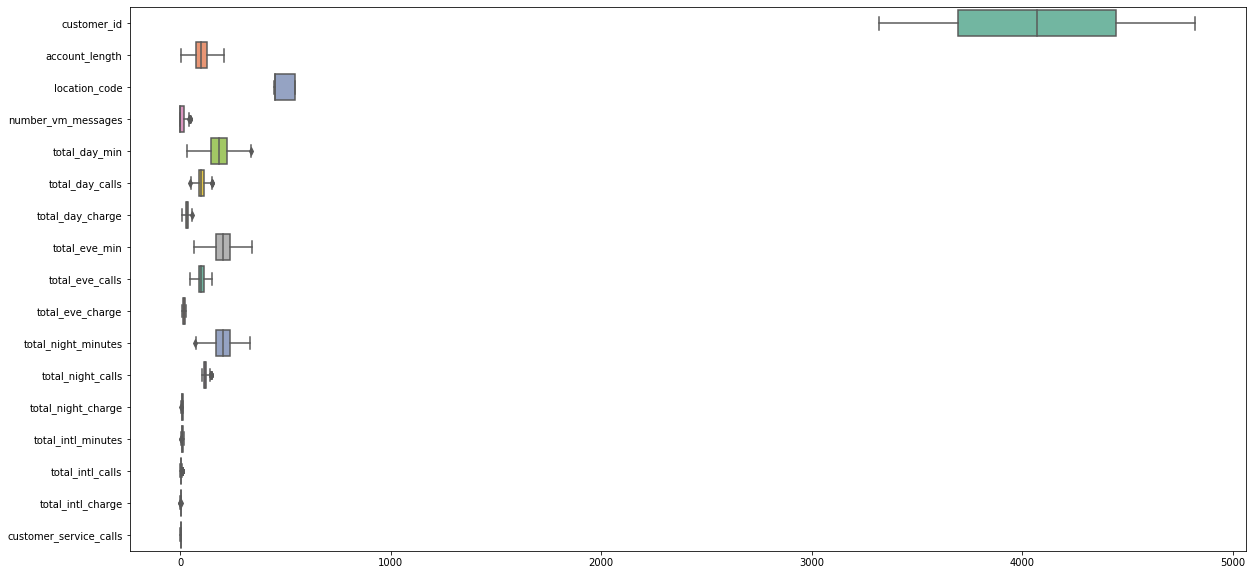

In [89]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [90]:
#sns.pairplot(df)

## Data Encoding

In [91]:
df['intertiol_plan'].replace(to_replace='yes', value=1, inplace=True)
df['intertiol_plan'].replace(to_replace='no', value=0, inplace=True)

df['voice_mail_plan'].replace(to_replace='yes', value=1, inplace=True)
df['voice_mail_plan'].replace(to_replace='no', value=0, inplace=True)

df = pd.get_dummies(df, columns=['location_code'])

In [92]:
df.head()

,customer_id,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,location_code_445.0,location_code_452.0,location_code_547.0
0,3322,91.0,1,0,0.0,258.4,112.0,42.89,190.0,93.0,...,158.6,105.0,7.09,12.1,3.0,3.27,2.0,1,0,0
1,3323,113.0,0,1,20.0,155.8,81.0,28.83,168.5,62.0,...,275.5,105.0,12.22,8.7,3.0,2.35,1.0,1,0,0
2,3324,122.0,0,0,0.0,237.2,137.0,40.30,263.8,134.0,...,251.3,105.0,10.81,8.8,4.0,2.38,1.0,1,0,0
3,3325,103.0,0,0,0.0,133.6,117.0,23.60,156.1,130.0,...,207.2,105.0,9.95,10.4,7.0,2.81,1.0,1,0,0
4,3326,111.0,0,0,0.0,115.6,120.0,24.54,211.1,66.0,...,140.9,105.0,5.76,12.7,1.0,3.43,1.0,0,1,0


In [96]:
# features = ['customer_id', 'intertiol_plan', 'voice_mail_plan', 'number_vm_messages', 'total_day_charge', 'total_eve_charge', 'total_intl_calls', 'customer_service_calls']
# X = df[features]

In [97]:
X

,customer_id,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_charge,total_eve_charge,total_intl_calls,customer_service_calls
0,3322,1,0,0.0,42.89,14.47,3.0,2.0
1,3323,0,1,20.0,28.83,13.73,3.0,1.0
2,3324,0,0,0.0,40.30,22.76,4.0,1.0
3,3325,0,0,0.0,23.60,13.37,7.0,1.0
4,3326,0,0,0.0,24.54,18.79,1.0,1.0
...,...,...,...,...,...,...,...,...
1495,4817,0,0,0.0,54.67,21.39,3.0,2.0
1496,4818,0,0,0.0,52.67,21.39,2.0,2.0
1497,4819,0,0,0.0,12.05,11.43,6.0,2.0
1498,4820,0,0,0.0,32.93,10.79,4.0,0.0


In [99]:
df.to_csv('preprocessed_test.csv')